In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_excel('../Data/Raw/cattle.xlsx')

In [3]:
df.head()

,AnimalNo,WHHeightAtWither,Rumpheight,BLBodylengthcm,Scapuloischiallength,SternumHeight,ChestDepth,RumpWidth,RumpLength,HeartGirth,AbdGirth,CannonBoneDiameter,HockBoneDiameter,ActualBodyWeight
0,436,132,139,190,150,58,83,43,40,172,217,18.0,40,379
1,26,131,140,183,150,58,85,42,38,172,215,18.0,40,398
2,2,143,147,197,154,67,95,41,30,188,217,18.0,51,407
3,11112,139,146,202,174,78,82,45,36,185,203,17.0,56,412
4,8,144,160,185,152,67,84,43,36,179,216,19.0,46,413


In [4]:
df.shape

(517, 14)

In [5]:
df.describe()

,AnimalNo,WHHeightAtWither,Rumpheight,BLBodylengthcm,Scapuloischiallength,SternumHeight,ChestDepth,RumpWidth,RumpLength,HeartGirth,AbdGirth,CannonBoneDiameter,HockBoneDiameter,ActualBodyWeight
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,10800.692456,151.431335,160.756286,212.661509,177.071567,65.847195,99.266925,46.340426,37.845261,202.653772,245.994197,20.277563,48.837524,602.344294
std,66719.581279,6.173024,6.408765,11.880034,9.689196,4.981930,5.277046,4.553320,3.568168,9.794697,13.357124,1.211556,4.830530,78.114614
min,2.000000,131.000000,139.000000,177.000000,145.000000,54.000000,82.000000,35.000000,28.000000,171.000000,203.000000,17.000000,40.000000,379.000000
25%,2740.000000,147.000000,157.000000,206.000000,171.000000,62.000000,96.000000,43.000000,36.000000,196.000000,238.000000,20.000000,45.000000,547.000000
50%,3425.000000,152.000000,161.000000,213.000000,178.000000,66.000000,100.000000,46.000000,38.000000,203.000000,246.000000,20.000000,48.000000,601.000000
75%,4186.000000,156.000000,165.000000,220.000000,184.000000,69.000000,103.000000,50.000000,40.000000,210.000000,255.000000,21.000000,52.000000,653.000000
max,999113.000000,169.000000,180.000000,246.000000,204.000000,80.000000,116.000000,59.000000,49.000000,233.000000,282.000000,24.000000,64.000000,824.000000


In [6]:
# check for missing values
df.isnull().sum()


AnimalNo                0
WHHeightAtWither        0
Rumpheight              0
BLBodylengthcm          0
Scapuloischiallength    0
SternumHeight           0
ChestDepth              0
RumpWidth               0
RumpLength              0
HeartGirth              0
AbdGirth                0
CannonBoneDiameter      0
HockBoneDiameter        0
ActualBodyWeight        0
dtype: int64

In [7]:
# checking duplicates
df.duplicated().sum()


0

In [8]:
# check data types
df.dtypes

AnimalNo                  int64
WHHeightAtWither          int64
Rumpheight                int64
BLBodylengthcm            int64
Scapuloischiallength      int64
SternumHeight             int64
ChestDepth                int64
RumpWidth                 int64
RumpLength                int64
HeartGirth                int64
AbdGirth                  int64
CannonBoneDiameter      float64
HockBoneDiameter          int64
ActualBodyWeight          int64
dtype: object

In [9]:
# change data types if necessary
# df['column_name'] = df['column_name'].astype('desired_type')
df['CannonBoneDiameter'] = df['CannonBoneDiameter'].astype(int)

In [10]:
df.head()

,AnimalNo,WHHeightAtWither,Rumpheight,BLBodylengthcm,Scapuloischiallength,SternumHeight,ChestDepth,RumpWidth,RumpLength,HeartGirth,AbdGirth,CannonBoneDiameter,HockBoneDiameter,ActualBodyWeight
0,436,132,139,190,150,58,83,43,40,172,217,18,40,379
1,26,131,140,183,150,58,85,42,38,172,215,18,40,398
2,2,143,147,197,154,67,95,41,30,188,217,18,51,407
3,11112,139,146,202,174,78,82,45,36,185,203,17,56,412
4,8,144,160,185,152,67,84,43,36,179,216,19,46,413


## EDA

### EDA Plan for Cattle Dataset

**Dataset Overview:**
- 517 cattle records
- 14 features (mostly body measurements)
- Target: Likely predicting body weight or classification

**EDA Structure:**
1. **Basic Data Understanding**
2. **Data Quality Assessment**
3. **Univariate Analysis**
4. **Bivariate Analysis**
5. **Multivariate Analysis**
6. **Feature Engineering Insights**

## Phase 1: Basic Data Understanding

In [11]:
# Dataset basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nBasic Info:")
df.info()

Dataset Shape: (517, 14)

Column Names:
['AnimalNo', 'WHHeightAtWither', 'Rumpheight', 'BLBodylengthcm', 'Scapuloischiallength', 'SternumHeight', 'ChestDepth', 'RumpWidth', 'RumpLength', 'HeartGirth', 'AbdGirth', 'CannonBoneDiameter', 'HockBoneDiameter', 'ActualBodyWeight']

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AnimalNo              517 non-null    int64
 1   WHHeightAtWither      517 non-null    int64
 2   Rumpheight            517 non-null    int64
 3   BLBodylengthcm        517 non-null    int64
 4   Scapuloischiallength  517 non-null    int64
 5   SternumHeight         517 non-null    int64
 6   ChestDepth            517 non-null    int64
 7   RumpWidth             517 non-null    int64
 8   RumpLength            517 non-null    int64
 9   HeartGirth            517 non-null    int64
 10  AbdGirth      

## Phase 2: Data Quality Assessment

In [12]:
# Missing values analysis
print("Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percent
})
print(missing_df[missing_df['Missing_Count'] > 0])

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25) # First quartile
    Q3 = df[column].quantile(0.75) # Third quartile
    IQR = Q3 - Q1 # It measures how far the data is spread out
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)] # anything outside the bounds is an outlier
    return len(outliers)

print("\nOutliers count per column:")
for col in df.select_dtypes(include=[np.number]).columns:
    outlier_count = detect_outliers(df, col)
    print(f"{col}: {outlier_count} outliers")

Missing Values:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []

Duplicate rows: 0

Outliers count per column:
AnimalNo: 132 outliers
WHHeightAtWither: 4 outliers
Rumpheight: 10 outliers
BLBodylengthcm: 10 outliers
Scapuloischiallength: 8 outliers
SternumHeight: 1 outliers
ChestDepth: 10 outliers
RumpWidth: 0 outliers
RumpLength: 9 outliers
HeartGirth: 4 outliers
AbdGirth: 6 outliers
CannonBoneDiameter: 53 outliers
HockBoneDiameter: 3 outliers
ActualBodyWeight: 2 outliers


In [13]:
df.shape

(517, 14)

## Phase 3: Univariate Analysis

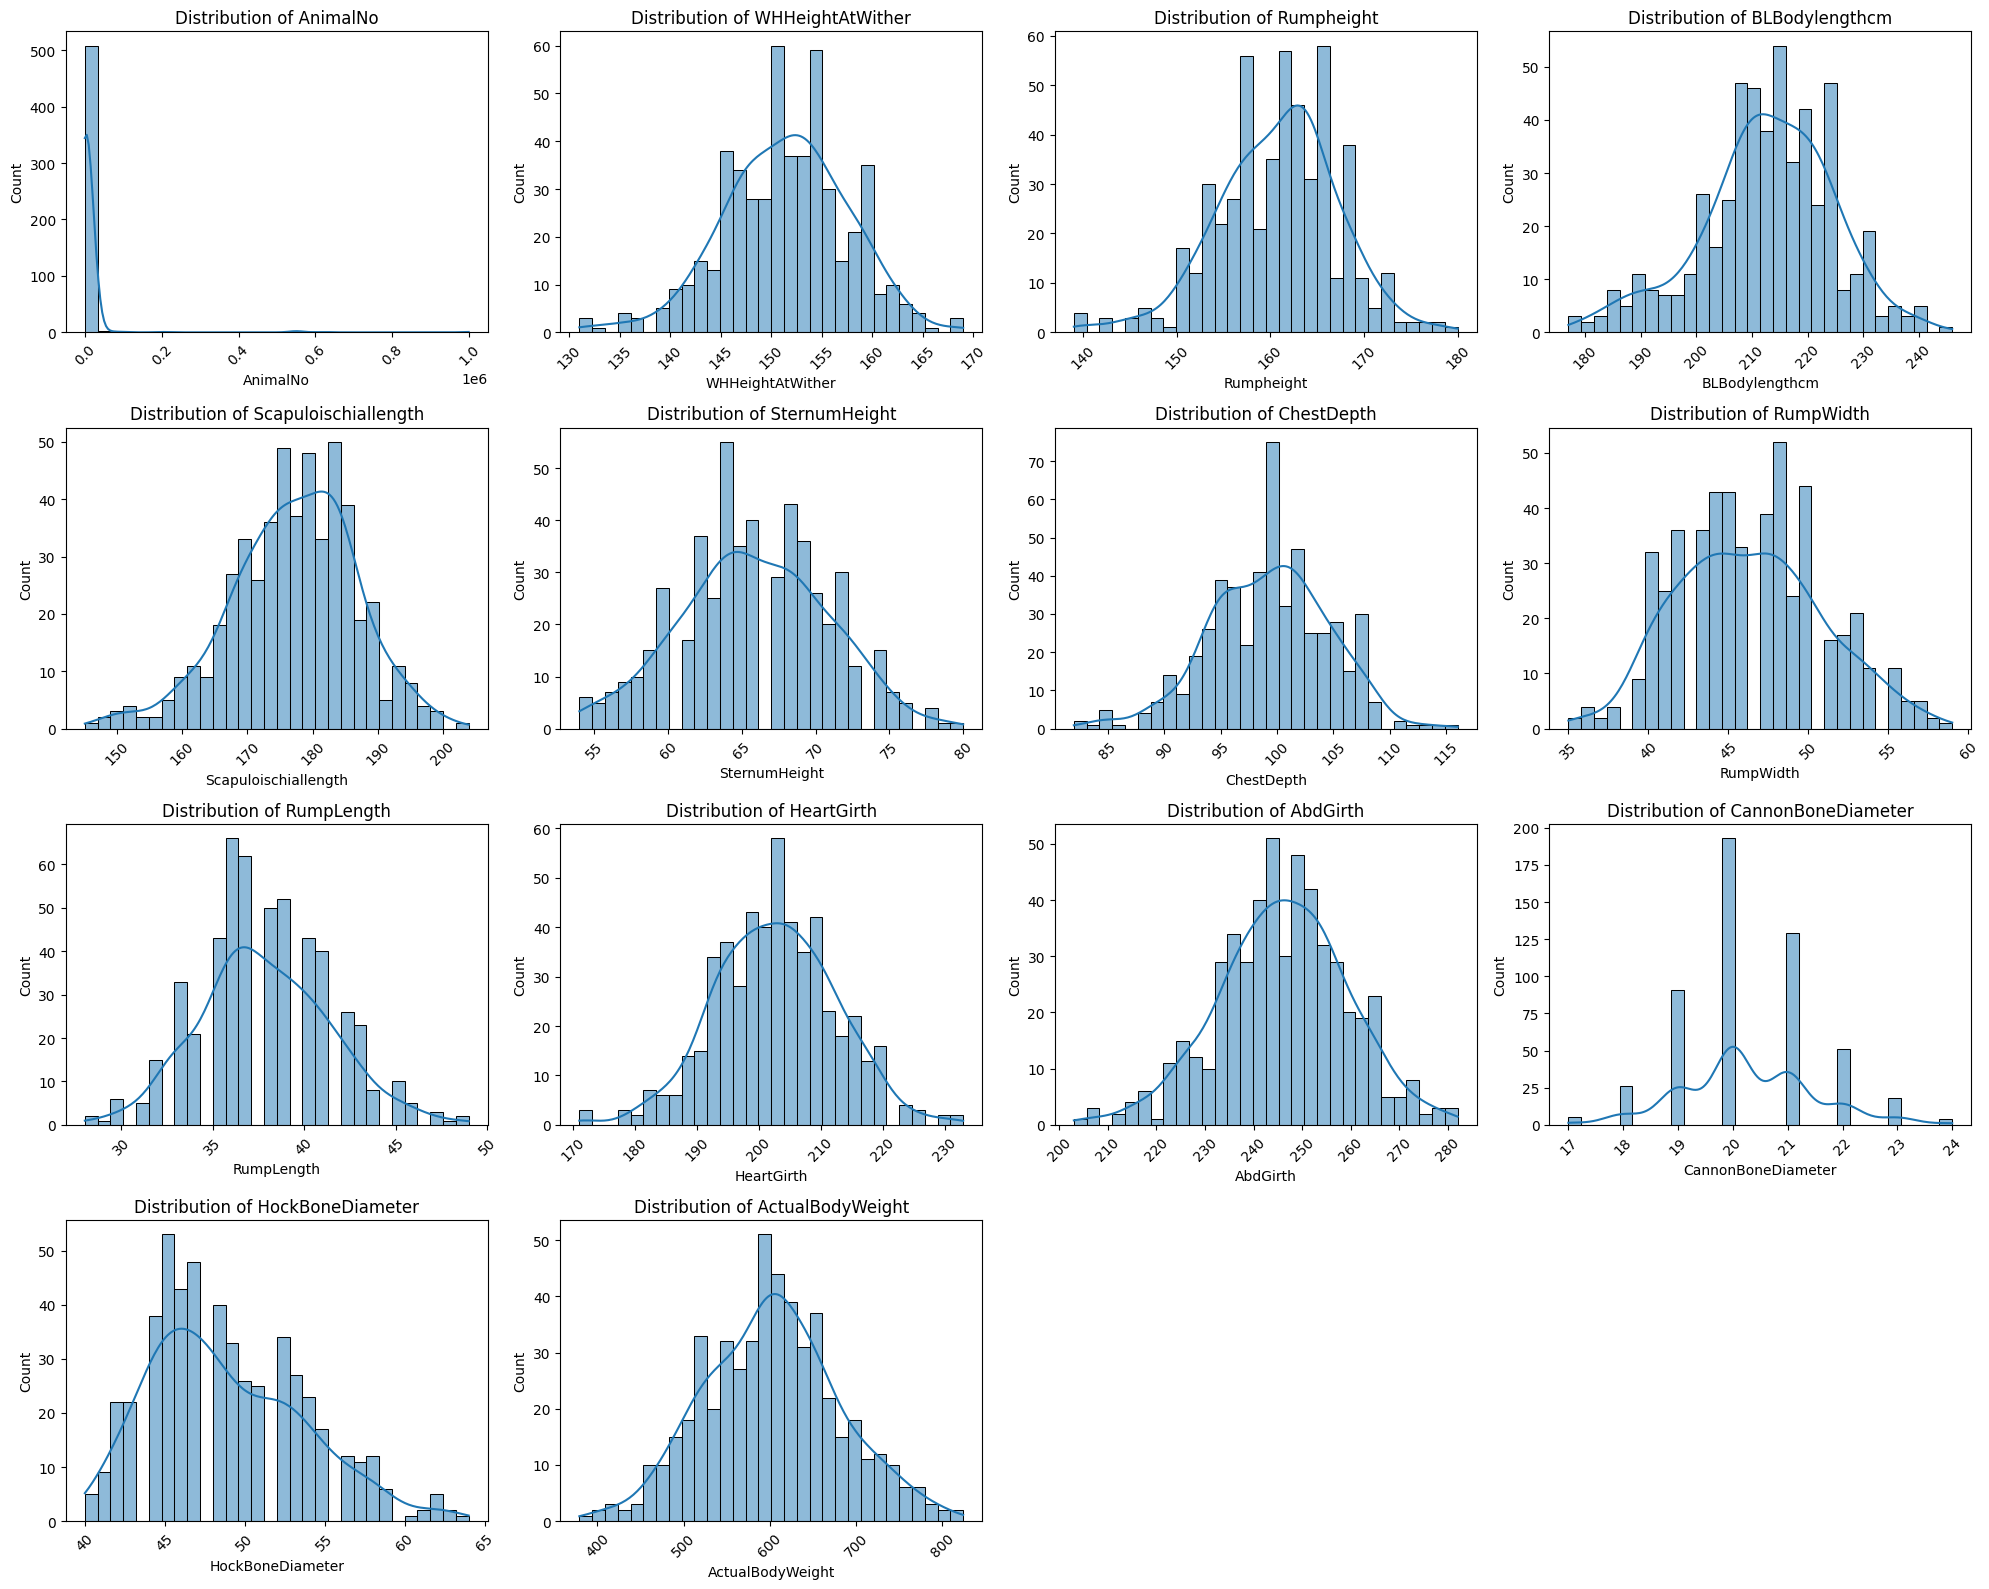

In [14]:
# Distribution analysis for all numerical columns
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

numerical_cols = df.select_dtypes(include=[np.number]).columns
for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

1. WHHeightAtWither
- Shape: Symmetrical and close to a Gaussian (bell curve).
- Center: Most animals cluster around a mid-height (approx. 140–160 units).
- Spread: Relatively tight — no extreme outliers visible.
- Implication: Good candidate for parametric models; reflects typical breed height variatio

2. Rumpheight
- Shape: Symmetrical, unimodal.
- Spread: Narrow — suggests breed/age uniformity.
- Implication: Likely strongly correlated with WHHeightAtWither.

3. BLBodylengthcm (Body Length)
- Shape: Slightly wider bell curve.
- Spread: Moderate, some data points on tails.
- Implication: Length variation exists — possibly due to breed differences.

4. Scapulischallength (Scapula Length)
- Shape: Near-perfect normal.
- Spread: Tight — indicates strong anatomical constraint.
- Implication: Consistent trait; low variability.

5. SternumHeight
- Shape: Symmetrical normal.
- Spread: Narrow.
- Implication: Useful for proportional body ratio studies.

6. ChestDepth
- Shape: Symmetrical but with slightly heavier tails (kurtosis).
- Spread: Moderate.
- Implication: Minor outliers possible; depth variation may indicate body condition differences.

8. RumpLength
- Shape: Bell curve but slightly right-skewed.
- Spread: Narrow.
- Implication: Few animals with longer rumps may be outliers or specific breeds.

10. AbdGirth
- Shape: Symmetrical normal.
- Spread: Moderate.
- Implication: May indicate feeding status or pregnancy in females.

12. HockBoneDiameter
- Shape: Slightly right-skewed.
- Spread: Broader than others — heavy tail towards larger diameters.
- Implication: A few animals have unusually large bone diameters; may need log transformation for modeling.

13. CannonBoneDiameter
- Shape: Multimodal (multiple peaks).
- Spread: Narrow within each mode but large between modes.
- Implication: This clearly suggests subpopulations — could be different breeds, sexes, or age categories. Needs grouping analysis.

#### Potential issues:
- HockBoneDiameter → `mild skewness`
- CannonBoneDiameter → `multimodality`

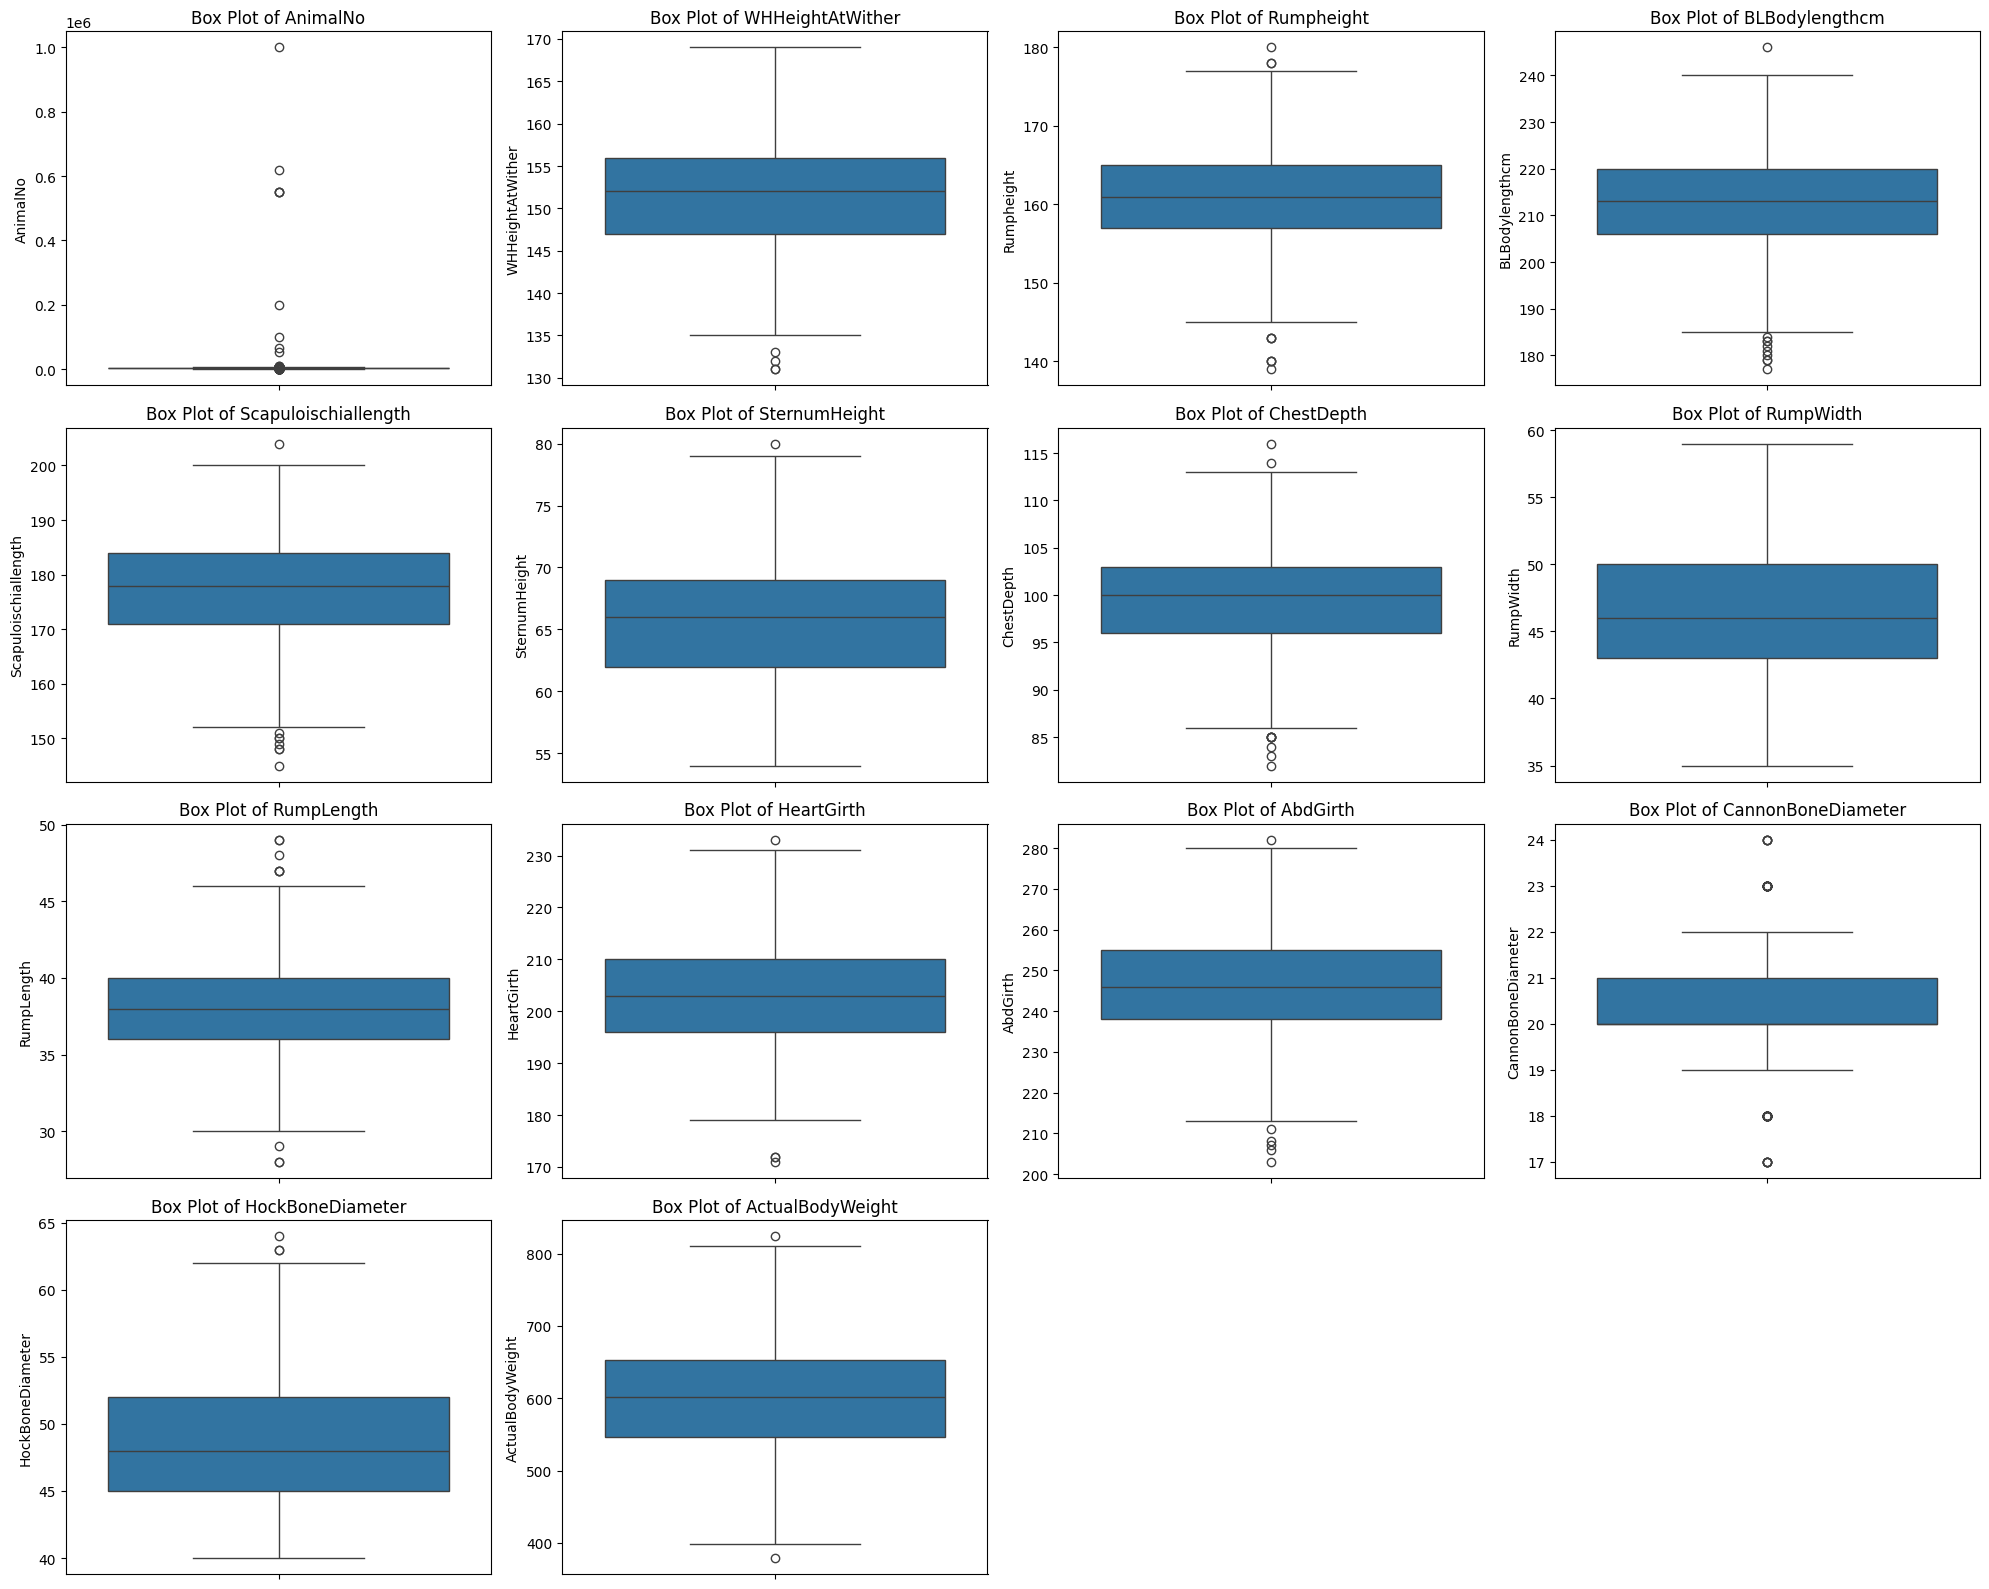

In [15]:
# Box plots for outlier detection
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Phase 4: Bivariate Analysis

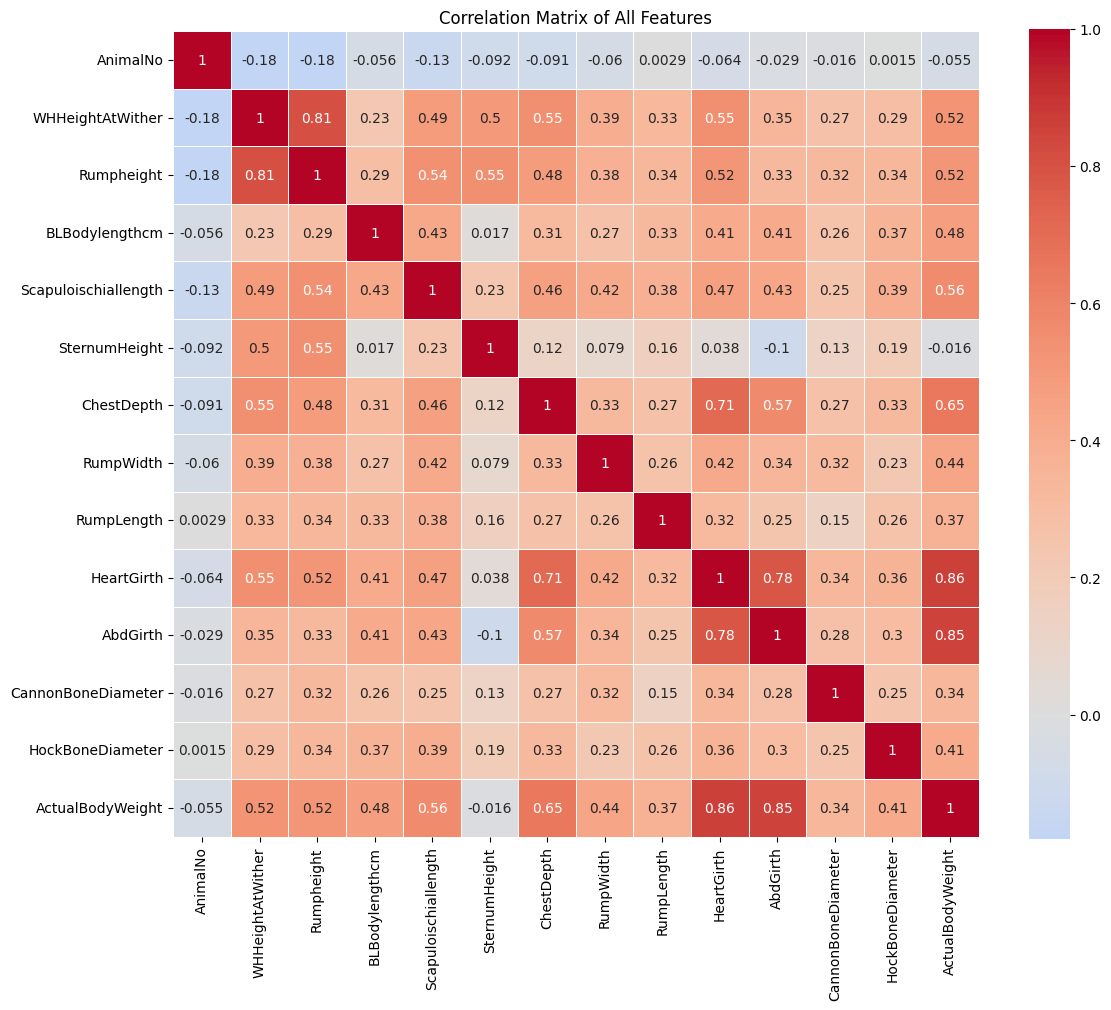


Strongest Correlations:
ActualBodyWeight  HeartGirth          0.859868
HeartGirth        ActualBodyWeight    0.859868
AbdGirth          ActualBodyWeight    0.851238
ActualBodyWeight  AbdGirth            0.851238
WHHeightAtWither  Rumpheight          0.808738
Rumpheight        WHHeightAtWither    0.808738
AbdGirth          HeartGirth          0.778769
HeartGirth        AbdGirth            0.778769
ChestDepth        HeartGirth          0.711864
HeartGirth        ChestDepth          0.711864
dtype: float64


In [16]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()

# Show strongest correlations
strongest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
print("\nStrongest Correlations:")
print(strongest_corr[strongest_corr < 1].head(10))


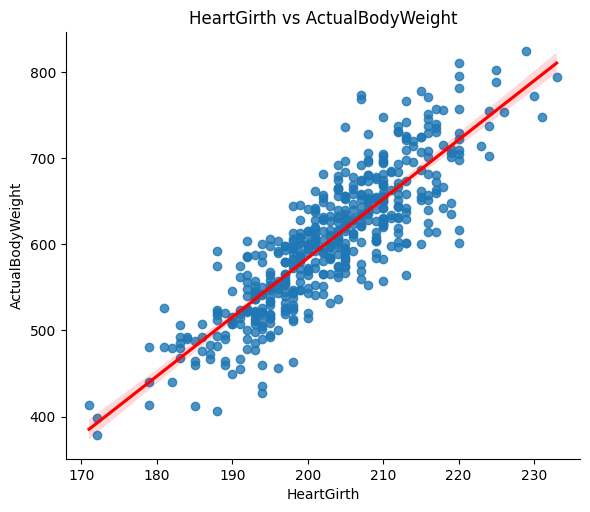

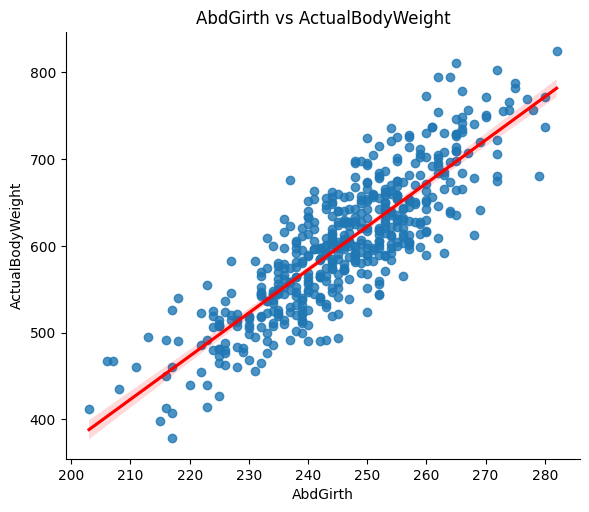

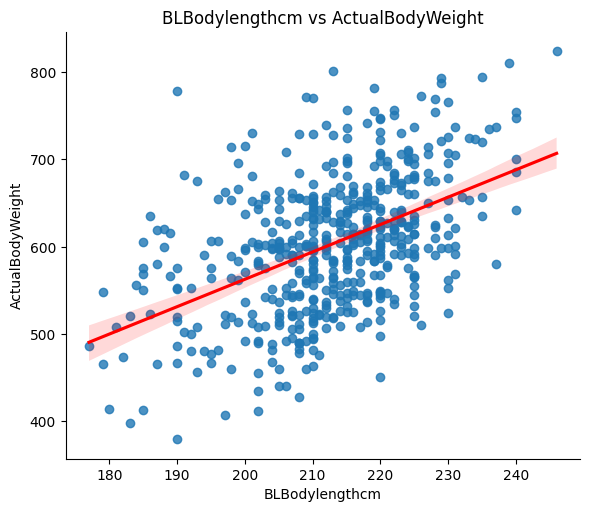

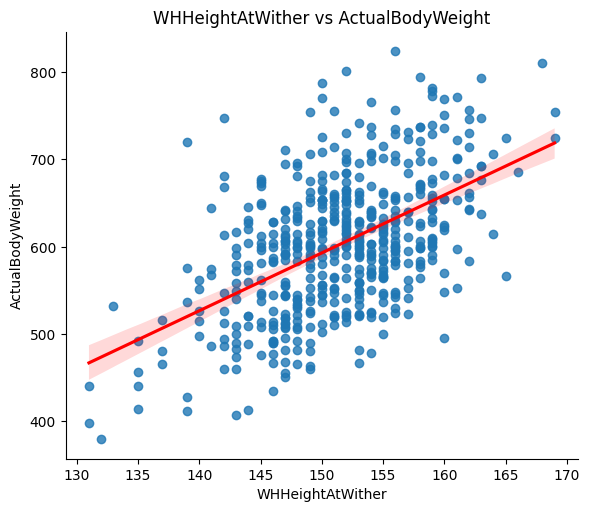

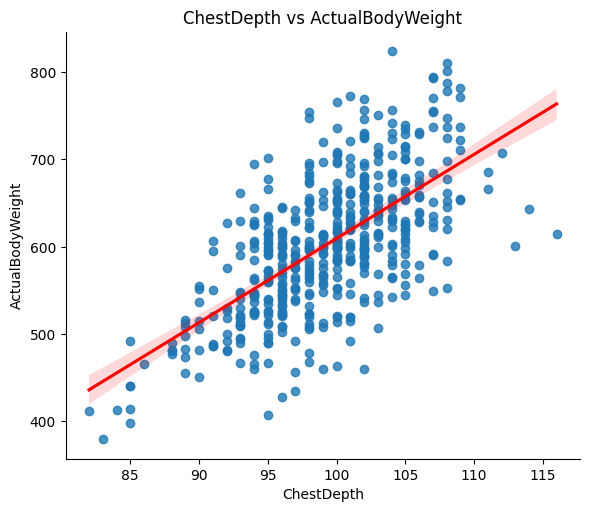

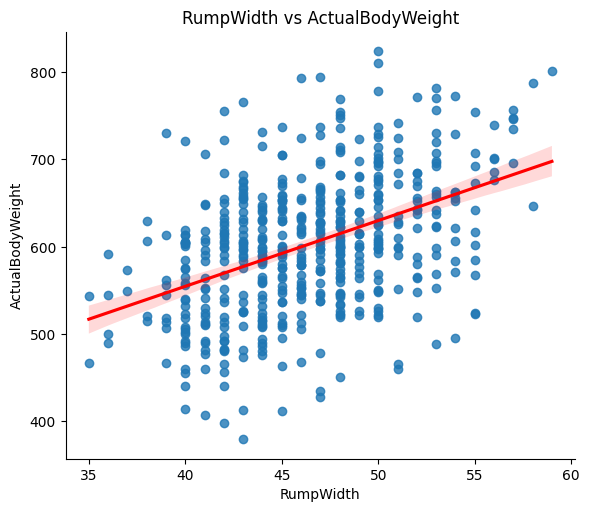

In [17]:
# Visualizing key features against ActualBodyWeight
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

key_features = ['HeartGirth', 'AbdGirth', 'BLBodylengthcm', 'WHHeightAtWither', 'ChestDepth', 'RumpWidth']

for feature in key_features:
    sns.lmplot(data=df, x=feature, y='ActualBodyWeight', line_kws={"color": "red"}, height=5, aspect=1.2)
    plt.title(f'{feature} vs ActualBodyWeight')

plt.show()


## Phase 5: Multivariate Analysis

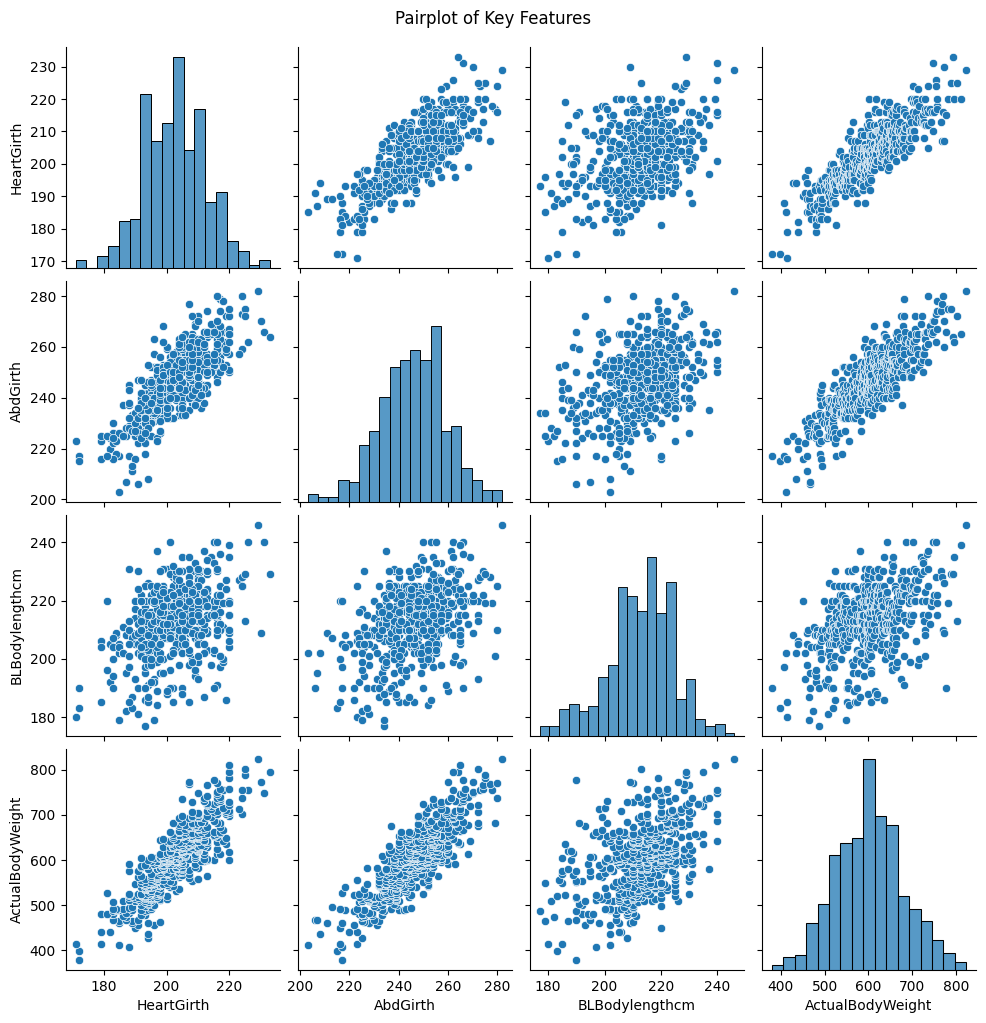

In [18]:
# Pairplot of key features
key_features_for_pairplot = ['HeartGirth', 'AbdGirth', 'BLBodylengthcm', 'ActualBodyWeight']
if all(col in df.columns for col in key_features_for_pairplot):
    sns.pairplot(df[key_features_for_pairplot], diag_kind='hist', height=2.5)
    plt.suptitle('Pairplot of Key Features', y=1.02)
    plt.show()

## Summary of Findings

### Data Quality
- *Dataset Size*: 517 records with 14 features
- *Missing Values*: Check for any missing data patterns
- *Outliers*: Identify and investigate extreme values
- *Data Types*: Mostly numerical measurements (good for ML)

### Key Relationships
- *Target Variable*: ActualBodyWeight appears is the prediction target
- *Strong Predictors*: Likely HeartGirth, AbdGirth, and BLBodylengthcm
- *Correlation Patterns*: Look for multicollinearity issues

### Feature Engineering Opportunities
1. *Body Shape Indices*: Ratios between different measurements
2. *Volumetric Features*: Approximate body volume calculations
3. *Structural Ratios*: Bone diameter relationships
4. *Scaling*: Some features may need normalization

### Next Steps for Modeling
1. *Data Preprocessing*: Handle outliers and scaling
2. *Feature Selection*: Use correlation and importance analysis
3. *Model Selection*: Regression models for weight prediction
4. *Validation*: Cross-validation for robust evaluation


Basic EDA is complete. Next steps:
- **Feature Engineering**: Create new features based on domain knowledge.
- **Modeling**: Start with simple models (linear regression, decision trees) to establish baselines.


## Data Cleaning and Preprocessing based on EDA Findings

### Outlier Reduction

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25) # First quartile
    Q3 = df[column].quantile(0.75) # Third quartile
    IQR = Q3 - Q1 # It measures how far the data is spread out
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)] # anything outside the bounds is an outlier
    return len(outliers)

print("\nOutliers count per column:")
for col in df.select_dtypes(include=[np.number]).columns:
    outlier_count = detect_outliers(df, col)
    print(f"{col}: {outlier_count} outliers")

# # Remove outliers from the dataset
# for col in df.select_dtypes(include=[np.number]).columns:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#     print(f"{col}: {outlier_count} outliers")







Outliers count per column:
AnimalNo: 132 outliers
WHHeightAtWither: 4 outliers
Rumpheight: 10 outliers
BLBodylengthcm: 10 outliers
Scapuloischiallength: 8 outliers
SternumHeight: 1 outliers
ChestDepth: 10 outliers
RumpWidth: 0 outliers
RumpLength: 9 outliers
HeartGirth: 4 outliers
AbdGirth: 6 outliers
CannonBoneDiameter: 53 outliers
HockBoneDiameter: 3 outliers
ActualBodyWeight: 2 outliers
AnimalNo: 2 outliers
WHHeightAtWither: 2 outliers
Rumpheight: 2 outliers
BLBodylengthcm: 2 outliers
Scapuloischiallength: 2 outliers
SternumHeight: 2 outliers
ChestDepth: 2 outliers
RumpWidth: 2 outliers
RumpLength: 2 outliers
HeartGirth: 2 outliers
AbdGirth: 2 outliers
CannonBoneDiameter: 2 outliers
HockBoneDiameter: 2 outliers
ActualBodyWeight: 2 outliers


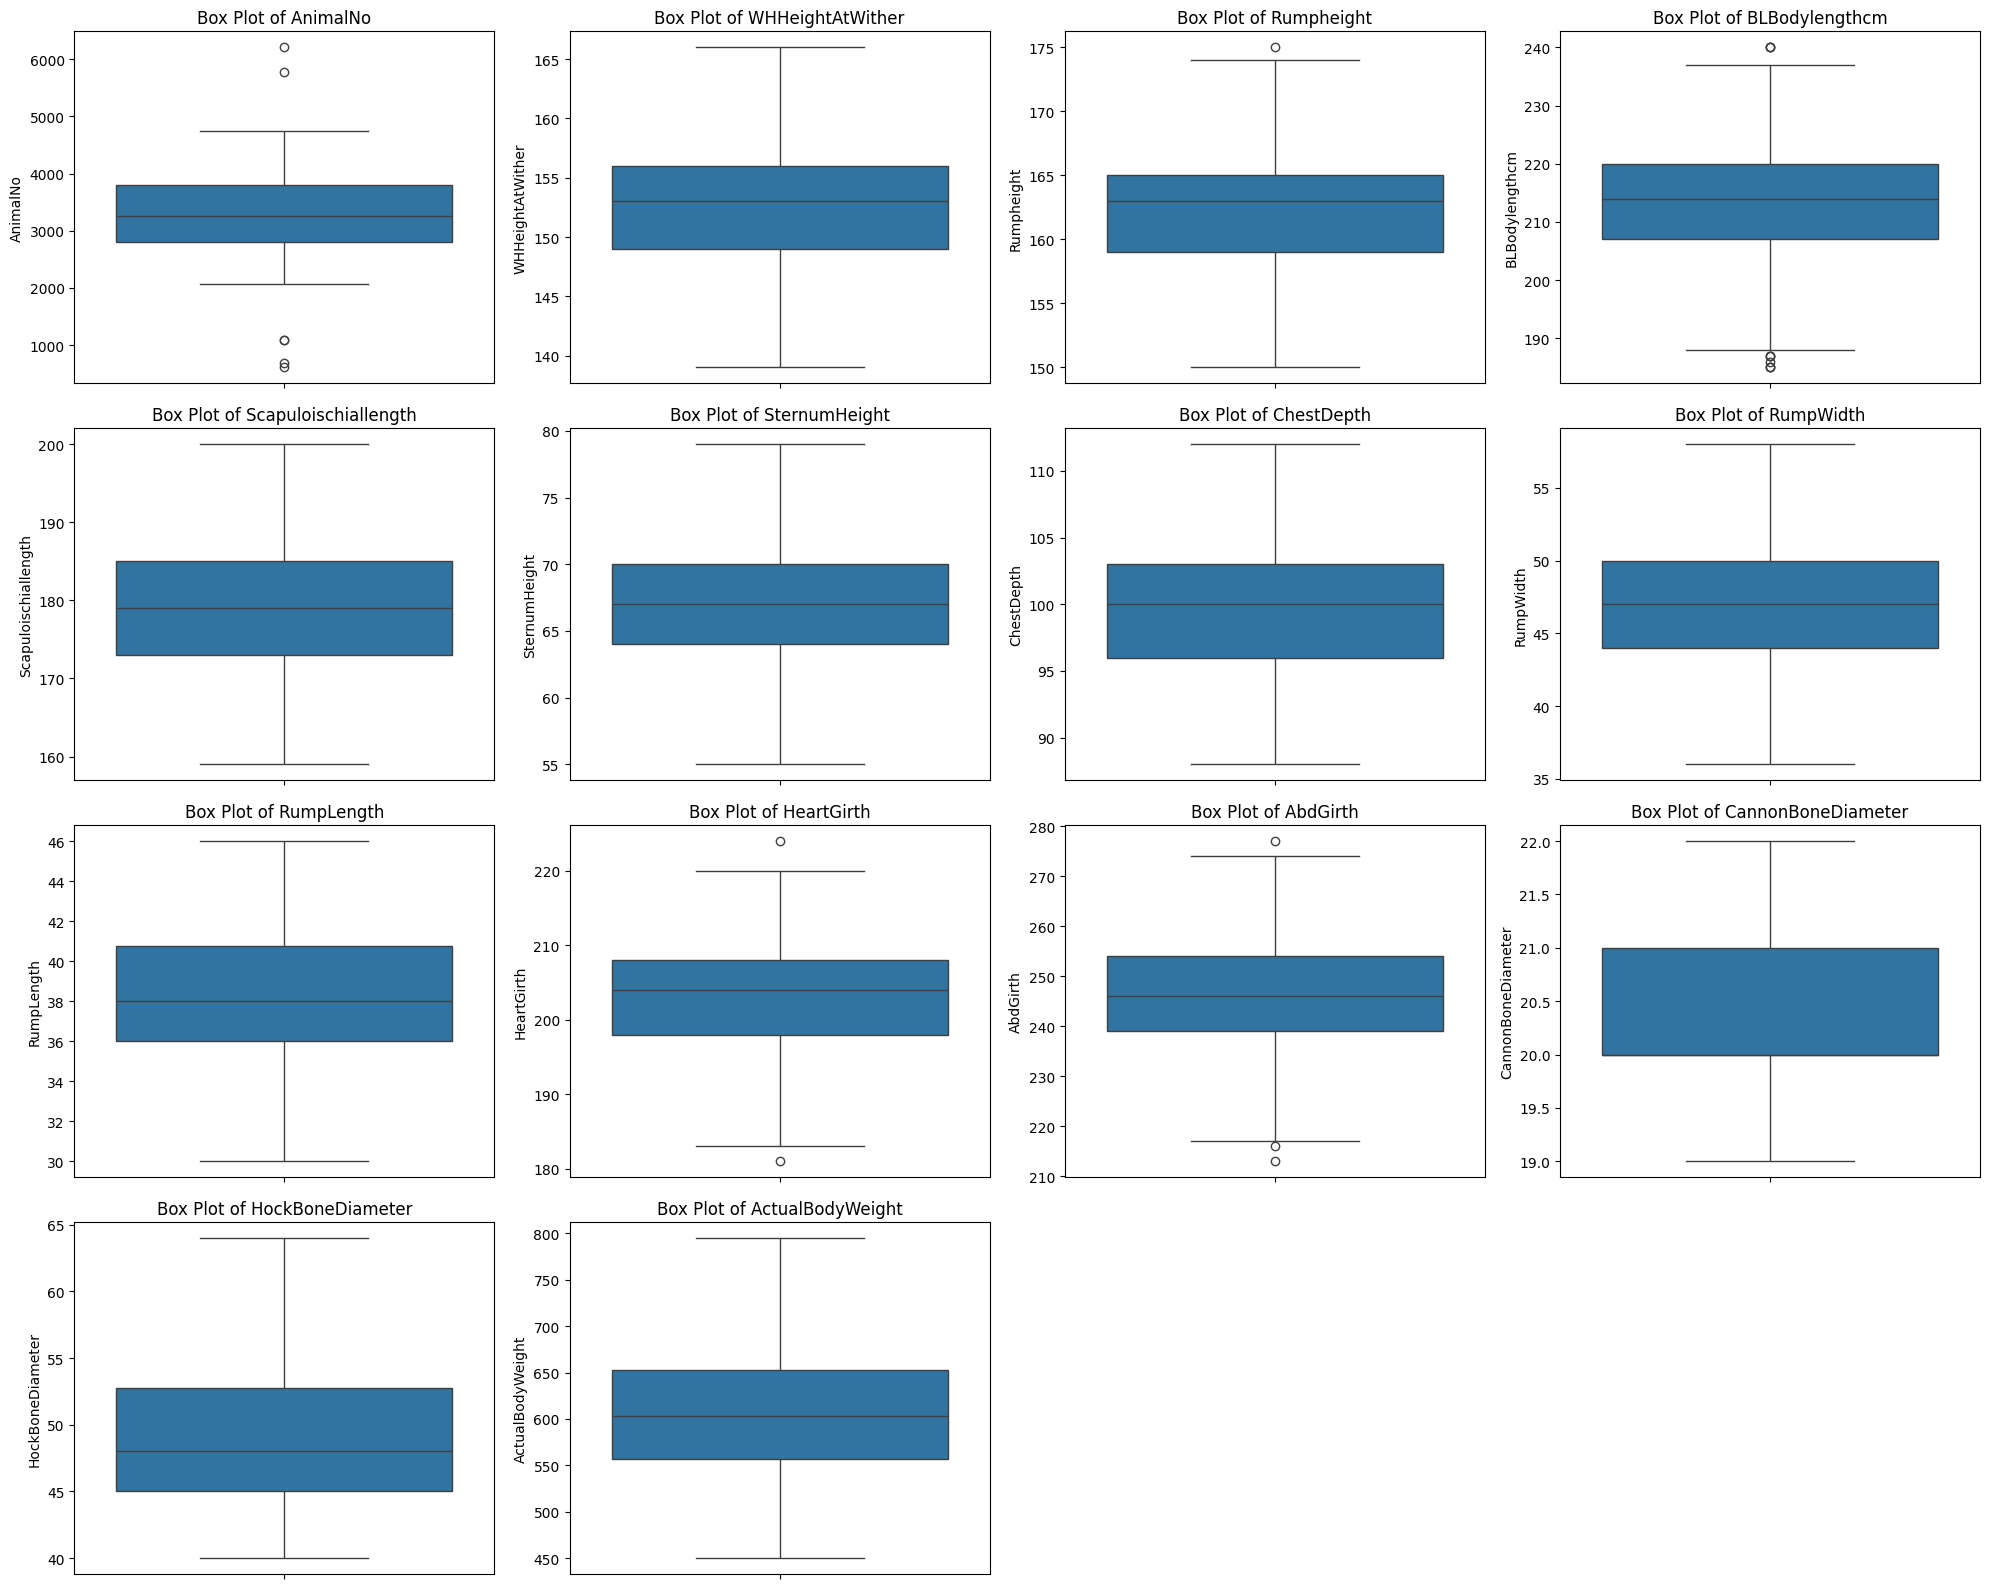

In [20]:
# Box plots for outlier detection
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Outliers reduced to almost NULL**

### Removing unnecessary features


In [21]:
# removing AnimalNo
df.drop(columns=['AnimalNo'], inplace=True)
df.head()

,WHHeightAtWither,Rumpheight,BLBodylengthcm,Scapuloischiallength,SternumHeight,ChestDepth,RumpWidth,RumpLength,HeartGirth,AbdGirth,CannonBoneDiameter,HockBoneDiameter,ActualBodyWeight
10,147,153,220,170,65,90,48,35,190,216,19,40,450
11,147,159,202,170,67,89,40,32,191,222,19,45,455
14,149,158,205,168,72,102,41,38,185,217,20,47,460
17,148,150,187,168,65,94,51,33,189,232,19,40,465
21,147,153,204,171,76,98,46,37,183,230,20,47,468


#### Removing uncorrelated features


In [22]:
# Show strongest correlations
strongest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
print("\nStrongest Correlations:")
print(strongest_corr[strongest_corr < 1].head(10))




Strongest Correlations:
ActualBodyWeight  HeartGirth          0.859868
HeartGirth        ActualBodyWeight    0.859868
AbdGirth          ActualBodyWeight    0.851238
ActualBodyWeight  AbdGirth            0.851238
WHHeightAtWither  Rumpheight          0.808738
Rumpheight        WHHeightAtWither    0.808738
AbdGirth          HeartGirth          0.778769
HeartGirth        AbdGirth            0.778769
ChestDepth        HeartGirth          0.711864
HeartGirth        ChestDepth          0.711864
dtype: float64


In [23]:
correlated_features = ['HeartGirth', 'AbdGirth', 'ChestDepth']

In [24]:
# dropping uncorrelated features
df = df[correlated_features + ['ActualBodyWeight']]


In [25]:
df.head()

,HeartGirth,AbdGirth,ChestDepth,ActualBodyWeight
10,190,216,90,450
11,191,222,89,455
14,185,217,102,460
17,189,232,94,465
21,183,230,98,468


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 10 to 513
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   HeartGirth        318 non-null    int64
 1   AbdGirth          318 non-null    int64
 2   ChestDepth        318 non-null    int64
 3   ActualBodyWeight  318 non-null    int64
dtypes: int64(4)
memory usage: 12.4 KB


In [27]:
df.shape

(318, 4)

In [28]:
# creating new csv for cleaned data
df.to_csv('../Data/Processed/cattle_cleaned.csv', index=False)